Import packages

In [1]:
from dataretrieval import nwis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

current_datetime = datetime.datetime.now()
print(current_datetime)

2025-01-07 10:42:14.487166


Identify USGS site IDs

In [2]:
siteNumber = ["12305000","06038800"
             # , "13340600", "13092747","13311000"
             ]
parameterCode = "00060" # Discharge
startDate = "2022-10-01"
#"1990-10-01"
endDate = "2024-09-30"

Retrive site infomation

In [3]:
site_info = nwis.get_info(sites= siteNumber )

site_info_df = pd.DataFrame( site_info[0] )

print( site_info_df )

#print( site_info_df.columns )

site_info_df["site_no"]=site_info_df["site_no"].astype(str)

columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va']

filtered_df = site_info_df[columns_to_save]

filtered_df.to_csv('site_info_df.csv', index=False)


  agency_cd   site_no                                  station_nm site_tp_cd  \
0      USGS  06038800  Madison River at Kirby Ranch nr Cameron MT         ST   
1      USGS  12305000                KOOTENAI RIVER AT LEONIA, ID         ST   

      lat_va     long_va  dec_lat_va  dec_long_va coord_meth_cd  coord_acy_cd  \
0  445319.16  1113451.19   44.888656  -111.580886             N             1   
1  483700.78  1160257.10   48.616883  -116.049194             N             1   

   ... local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd  \
0  ...             Y              C    NYNNNNNN          NaN      NaN   
1  ...             Y              C    NNNNNNNN          NaN      NaN   

  aqfr_type_cd well_depth_va hole_depth_va  depth_src_cd  project_no  
0          NaN           NaN           NaN           NaN         NaN  
1          NaN           NaN           NaN           NaN         NaN  

[2 rows x 42 columns]


Extract stream temp data

In [4]:
parameterCode = "00010" 

dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print( dailyStreamtemp_df)

#print( dailyStreamtemp_df.dtypes)
#print( type(dailyStreamtemp_df[["Date"]]) )

       site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
0     06038800 2022-10-01 00:00:00+00:00           15.9                A   
1     06038800 2022-10-02 00:00:00+00:00           14.5                A   
2     06038800 2022-10-03 00:00:00+00:00           15.4                A   
3     06038800 2022-10-04 00:00:00+00:00           16.9                A   
4     06038800 2022-10-05 00:00:00+00:00           17.0                A   
...        ...                       ...            ...              ...   
1278  12305000 2024-09-26 00:00:00+00:00           15.7                P   
1279  12305000 2024-09-27 00:00:00+00:00           14.3                P   
1280  12305000 2024-09-28 00:00:00+00:00           14.1                P   
1281  12305000 2024-09-29 00:00:00+00:00           14.2                P   
1282  12305000 2024-09-30 00:00:00+00:00           13.6                P   

      00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd        Date  \
0        

Identify the minimum date of stream temp

In [5]:
min_dailyStreamtemp_date = str( dailyStreamtemp_df["Date"].iloc[0] )
print(  
   min_dailyStreamtemp_date 
 
)
print( type(  min_dailyStreamtemp_date )    )

2022-10-01
<class 'str'>


extract streamflow data

In [6]:
parameterCode = "00060" 
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start= min_dailyStreamtemp_date , end=endDate) 
#print(dailyStreamflow)
#print( type(dailyStreamflow) )

dailyStreamflow_df = pd.DataFrame( dailyStreamflow[0] )
dailyStreamflow_df =dailyStreamflow_df .reset_index()


# Convert datetime to date (remove the time part)
dailyStreamflow_df['Date'] = dailyStreamflow_df['datetime'].dt.date
dailyStreamflow_df['Month'] = dailyStreamflow_df['datetime'].dt.month
dailyStreamflow_df['Year'] = dailyStreamflow_df['datetime'].dt.year

dailyStreamflow_df = dailyStreamflow_df[ dailyStreamflow_df['Month'].isin( [6,7,8] )    ]

print(dailyStreamflow_df)

       site_no                  datetime  00060_Mean 00060_Mean_cd  \
243   06038800 2023-06-01 00:00:00+00:00      3000.0             A   
244   06038800 2023-06-02 00:00:00+00:00      2770.0             A   
245   06038800 2023-06-03 00:00:00+00:00      2550.0             A   
246   06038800 2023-06-04 00:00:00+00:00      2400.0             A   
247   06038800 2023-06-05 00:00:00+00:00      2280.0             A   
...        ...                       ...         ...           ...   
1427  12305000 2024-08-27 00:00:00+00:00      8580.0             A   
1428  12305000 2024-08-28 00:00:00+00:00      8610.0             A   
1429  12305000 2024-08-29 00:00:00+00:00      8620.0             A   
1430  12305000 2024-08-30 00:00:00+00:00      8590.0             A   
1431  12305000 2024-08-31 00:00:00+00:00      8560.0             A   

            Date  Month  Year  
243   2023-06-01      6  2023  
244   2023-06-02      6  2023  
245   2023-06-03      6  2023  
246   2023-06-04      6  2023  

GEE PRISM: https://code.earthengine.google.com/12de9c666ea94a1111f489bea638dd58

In [7]:

shared_url = "https://drive.google.com/file/d/1fAeIzkP8cRqY3iFmFHa9TbBKoE6lxQJh/view?usp=share_link"

# Extract the file ID
file_id = shared_url.split('/d/')[1].split('/')[0]

# Create the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a pandas DataFrame
prism_df = pd.read_csv(download_url)

prism_df['date'] = pd.to_datetime( prism_df['date'])

def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days
    # Adjust for negative values (wrap-around)
    return days_difference if days_difference >= 0 else days_difference + 365

# Apply the function to calculate days since October 1st
prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)

prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365

prism_df["site_no"] =prism_df["site_no"].astype(str)

# Add a leading 0 to strings with exactly 7 characters
prism_df['site_no'] = prism_df['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

prism_df["site_no"] =prism_df["site_no"].astype(str)

print( prism_df)

print( prism_df.dtypes )

print(  prism_df["site_no"].unique()  )

print(siteNumber)

            date      tmean   site_no  Days_Since_October_1st     rad_d
0     1995-01-01 -18.306002  06038800                      92  1.583707
1     1995-01-02 -17.829000  06038800                      93  1.600921
2     1995-01-03 -18.317001  06038800                      94  1.618135
3     1995-01-04 -15.904000  06038800                      95  1.635350
4     1995-01-05 -11.903001  06038800                      96  1.652564
...          ...        ...       ...                     ...       ...
54395 2024-10-10   9.048050  13311000                       9  0.154928
54396 2024-10-11   9.102850  13311000                      10  0.172142
54397 2024-10-12   9.169550  13311000                      11  0.189356
54398 2024-10-13  10.279050  13311000                      12  0.206570
54399 2024-10-14  10.417600  13311000                      13  0.223785

[54400 rows x 5 columns]
date                      datetime64[ns]
tmean                            float64
site_no                     

12305000
<class 'str'>
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
32640 1995-01-01 -10.211000  12305000                      92  1.583707   
32641 1995-01-02 -10.491000  12305000                      93  1.600921   
32642 1995-01-03 -11.349001  12305000                      94  1.618135   
32643 1995-01-04 -11.882001  12305000                      95  1.635350   
32644 1995-01-05 -11.491000  12305000                      96  1.652564   
...          ...        ...       ...                     ...       ...   
43515 2024-10-10  10.007200  12305000                       9  0.154928   
43516 2024-10-11   8.662700  12305000                      10  0.172142   
43517 2024-10-12   9.974999  12305000                      11  0.189356   
43518 2024-10-13  11.141400  12305000                      12  0.206570   
43519 2024-10-14  13.207850  12305000                      13  0.223785   

       sin_rday  cos_rday  
32640  0.999917 -0.012910  
32641  0.999546 -0.0

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/227872368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/227872368.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )


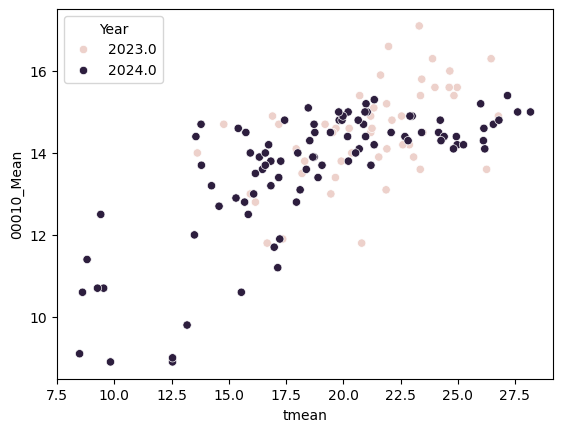

<Figure size 800x600 with 0 Axes>

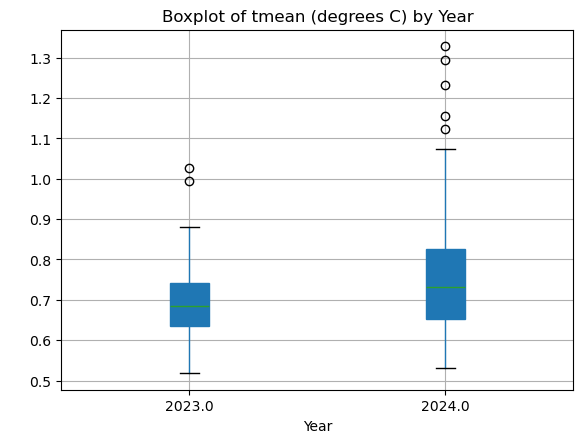

Year
2023.0    0.684794
2024.0    0.731873
Name: w_a, dtype: float64
Year
2023    6035.0
2024    5205.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
2023.0  0.684794      6035.0  8.705331
2024.0  0.731873      5205.0  8.557375
06038800
<class 'str'>
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
0     1995-01-01 -18.306002  06038800                      92  1.583707   
1     1995-01-02 -17.829000  06038800                      93  1.600921   
2     1995-01-03 -18.317001  06038800                      94  1.618135   
3     1995-01-04 -15.904000  06038800                      95  1.635350   
4     1995-01-05 -11.903001  06038800                      96  1.652564   
...          ...        ...       ...                     ...       ...   
10875 2024-10-10  11.114450  06038800                       9  0.154928   
10876 2024-10-11  11.936200  06038800                      10  0.172142   
10877 202

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/227872368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/227872368.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )


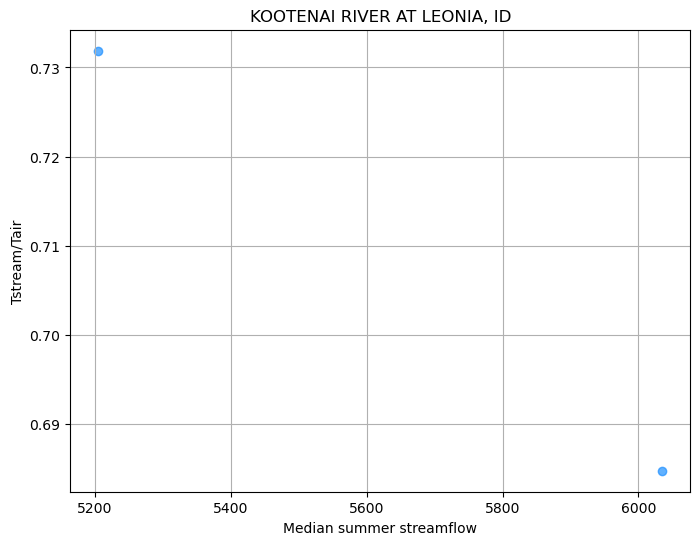

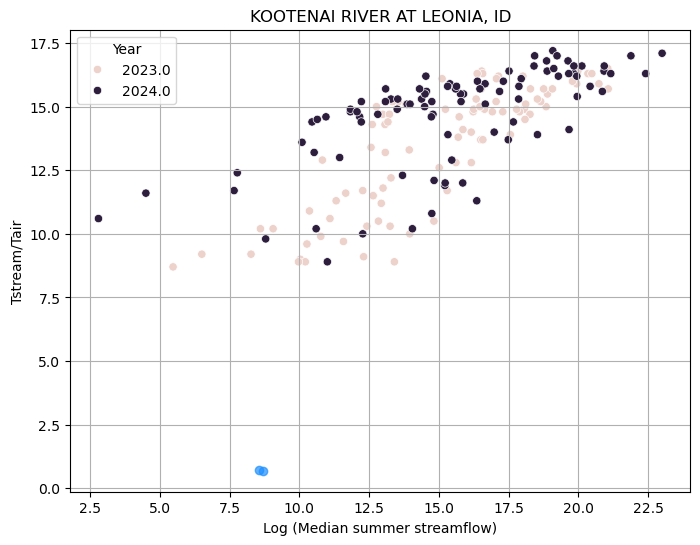

<Figure size 800x600 with 0 Axes>

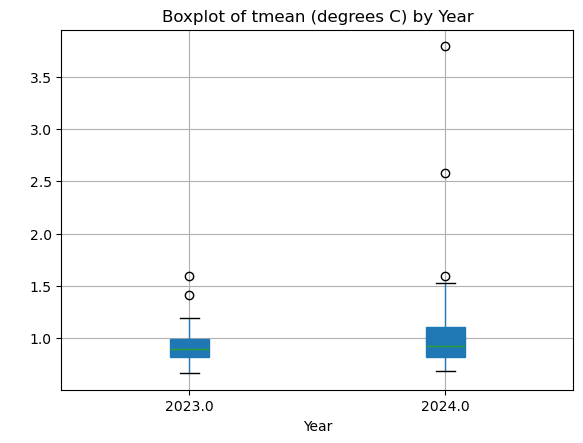

Year
2023.0    0.896517
2024.0    0.930240
Name: w_a, dtype: float64
Year
2023    6035.0
2024    5205.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
2023.0  0.896517      6035.0  8.705331
2024.0  0.930240      5205.0  8.557375


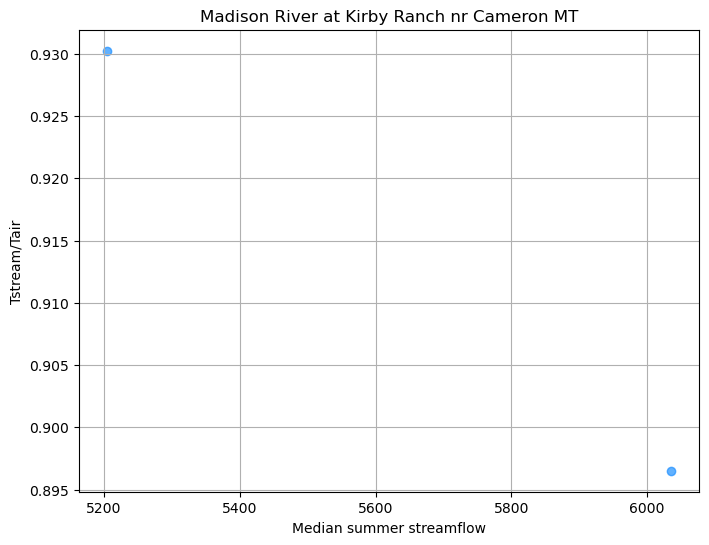

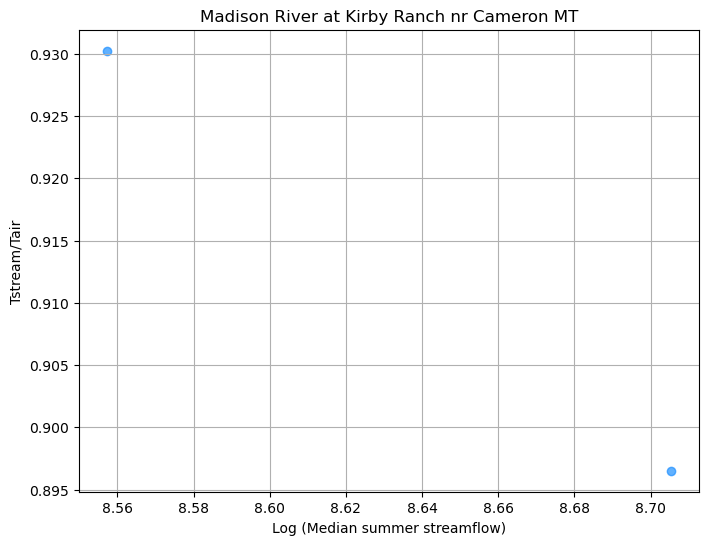

In [8]:
for site in siteNumber: # prism_df["site_no"].unique(): #
    print(site)
    print( type(site) ) 

    prism_df2 = prism_df[prism_df["site_no"] == site ]

    prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
    prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )

    print( prism_df2   )
    

    
    #model = smf.ols('tmean ~ sin_rday + cos_rday', data= prism_df2 ).fit()
    #prism_df2['fit'] = model.predict( prism_df2 )

    
    #print(model.summary())

    #plt.figure(figsize=(10, 5))
    #plt.plot( prism_df2['date'],  prism_df2['fit'], label='Fit', color='dodgerblue', alpha=0.8)
    #plt.scatter( prism_df2['date'],  prism_df2['tmean'], label=' ', color='green', alpha=0.8)
    #plt.xlabel('Date')
    #plt.ylabel('Fit Value')
    #plt.title('Fit vs Date')
    #plt.grid(alpha=0.3)
    #plt.legend()
    #plt.tight_layout()
   # plt.show()

    dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])
    dailyStreamtemp_df["site_no"] = dailyStreamtemp_df["site_no"].astype(str)
    dailyStreamtemp_df2=dailyStreamtemp_df[ dailyStreamtemp_df['site_no'] == site        ]
    print(     "dailyStreamtemp_df2:",    dailyStreamtemp_df2 )
    merged_df = pd.merge( prism_df2,  dailyStreamtemp_df2,     left_on='date', right_on='Date',  how='outer')
    merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )    ]
    print( merged_df.head()         )

    sns.scatterplot(data= merged_df,  x='tmean', y='00010_Mean', hue='Year')
    merged_df["w_a"] = merged_df["00010_Mean"]/merged_df["tmean"]
    #merged_df["w_a"] 
    plt.figure(figsize=(8, 6))
    merged_df.boxplot(column="w_a", by='Year', patch_artist=True)

# Set plot title and labels
    plt.title('Boxplot of tmean (degrees C) by Year')
    plt.suptitle('')  # To remove the default "Boxplot" title
    plt.xlabel('Year')
    plt.ylabel(' ')

# Show the plot
    plt.show()

    median_buffer = merged_df.groupby('Year')["w_a"].median()


    print(median_buffer)

    median_Q = dailyStreamflow_df.groupby('Year')["00060_Mean"].median()


    print(median_Q)

    Q_buffer = pd.merge( median_buffer,  median_Q, on='Year')

    Q_buffer["log_Q"] =np.log(    Q_buffer["00060_Mean"] )
    
    print( Q_buffer)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['00060_Mean'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    site_info_df2=site_info_df[site_info_df["site_no"] == site     ]
    plt.title(  site_info_df2['station_nm'].iloc[0]  )
    plt.xlabel('Median summer streamflow')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['log_Q'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    plt.title(  site_info_df2['station_nm'].iloc[0]  )
    plt.xlabel('Log (Median summer streamflow)')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)
    

Fit the linear regression model for each site

12305000
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
32640 1995-01-01 -10.211000  12305000                      92  1.583707   
32641 1995-01-02 -10.491000  12305000                      93  1.600921   
32642 1995-01-03 -11.349001  12305000                      94  1.618135   
32643 1995-01-04 -11.882001  12305000                      95  1.635350   
32644 1995-01-05 -11.491000  12305000                      96  1.652564   
...          ...        ...       ...                     ...       ...   
43515 2024-10-10  10.007200  12305000                       9  0.154928   
43516 2024-10-11   8.662700  12305000                      10  0.172142   
43517 2024-10-12   9.974999  12305000                      11  0.189356   
43518 2024-10-13  11.141400  12305000                      12  0.206570   
43519 2024-10-14  13.207850  12305000                      13  0.223785   

       sin_rday  cos_rday  
32640  0.999917 -0.012910  
32641  0.999546 -0.030120  
32642 

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

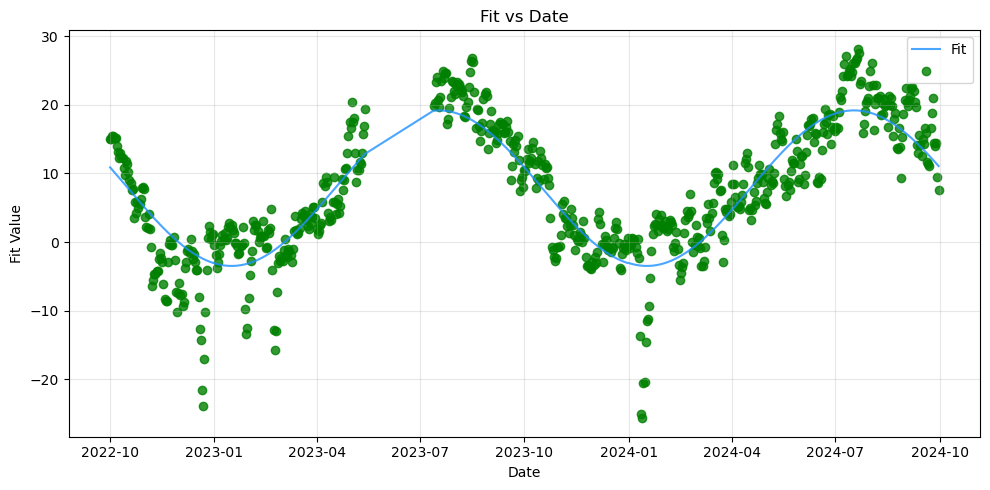

06038800
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
0     1995-01-01 -18.306002  06038800                      92  1.583707   
1     1995-01-02 -17.829000  06038800                      93  1.600921   
2     1995-01-03 -18.317001  06038800                      94  1.618135   
3     1995-01-04 -15.904000  06038800                      95  1.635350   
4     1995-01-05 -11.903001  06038800                      96  1.652564   
...          ...        ...       ...                     ...       ...   
10875 2024-10-10  11.114450  06038800                       9  0.154928   
10876 2024-10-11  11.936200  06038800                      10  0.172142   
10877 2024-10-12  10.728550  06038800                      11  0.189356   
10878 2024-10-13  10.464849  06038800                      12  0.206570   
10879 2024-10-14  13.079100  06038800                      13  0.223785   

       sin_rday  cos_rday  
0      0.999917 -0.012910  
1      0.999546 -0.030120  
2     

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )


                            OLS Regression Results                            
Dep. Variable:                  tmean   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 2.024e+04
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:42:23   Log-Likelihood:                -31699.
No. Observations:               10880   AIC:                         6.340e+04
Df Residuals:                   10877   BIC:                         6.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9518      0.043     92.459      0.0

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/3169184596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['fit'] = model.predict( prism_df2 )


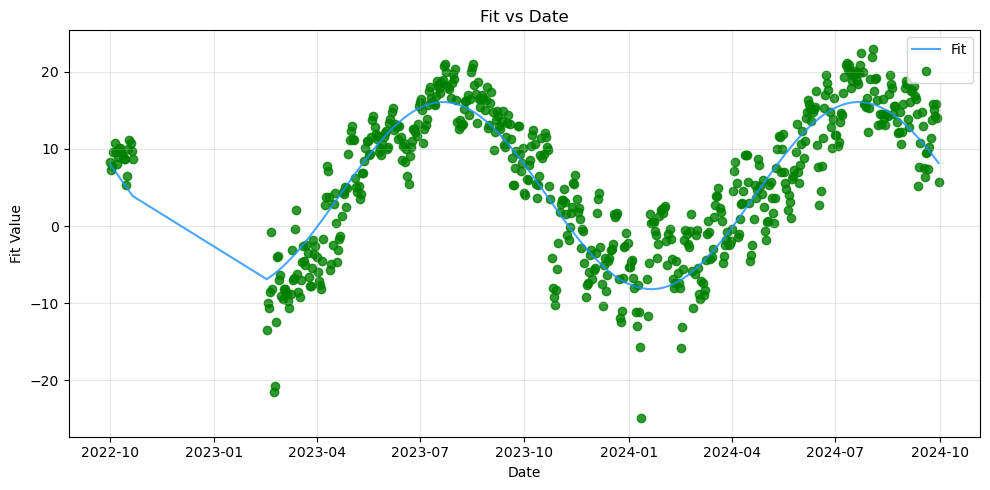

In [9]:
for site in siteNumber: # prism_df["site_no"].unique(): #
    print(site)

    prism_df2 = prism_df[prism_df["site_no"] == site ]

    prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
    prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )

    print( prism_df2   )
    
    model = smf.ols('tmean ~ sin_rday + cos_rday', data= prism_df2 ).fit()
    prism_df2['fit'] = model.predict( prism_df2 )
# Print the summary of the model
    print(model.summary())

    dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])
    dailyStreamtemp_df["site_no"] = dailyStreamtemp_df["site_no"].astype(str)
    dailyStreamtemp_df2=dailyStreamtemp_df[ dailyStreamtemp_df['site_no'] == site        ]
    print(     "dailyStreamtemp_df2:",    dailyStreamtemp_df2 )
    merged_df = pd.merge( prism_df2,  dailyStreamtemp_df2,     left_on='date', right_on='Date',  how='outer')
    #merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )   ]
    merged_df=merged_df.dropna()

    # Function to calculate water year
    def get_water_year(date):
        if date.month >= 10:  # October to December: water year is the current year
            return date.year +1
        else:  # January to September: water year is the previous year
            return date.year

# Apply the function to the date column
    merged_df['water_year'] = merged_df['Date'].apply(get_water_year)
    
    print( merged_df.head()         )

    plt.figure(figsize=(10, 5))
    plt.plot( merged_df['date'],  merged_df['fit'], label='Fit', color='dodgerblue', alpha=0.8)
    plt.scatter( merged_df['date'],  merged_df['tmean'], label=' ', color='green', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Fit Value')
    plt.title('Fit vs Date')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

Fit the YEARLY linear regression model for each site

12305000
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
32640 1995-01-01 -10.211000  12305000                      92  1.583707   
32641 1995-01-02 -10.491000  12305000                      93  1.600921   
32642 1995-01-03 -11.349001  12305000                      94  1.618135   
32643 1995-01-04 -11.882001  12305000                      95  1.635350   
32644 1995-01-05 -11.491000  12305000                      96  1.652564   
...          ...        ...       ...                     ...       ...   
43515 2024-10-10  10.007200  12305000                       9  0.154928   
43516 2024-10-11   8.662700  12305000                      10  0.172142   
43517 2024-10-12   9.974999  12305000                      11  0.189356   
43518 2024-10-13  11.141400  12305000                      12  0.206570   
43519 2024-10-14  13.207850  12305000                      13  0.223785   

       sin_rday  cos_rday  
32640  0.999917 -0.012910  
32641  0.999546 -0.030120  
32642 

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

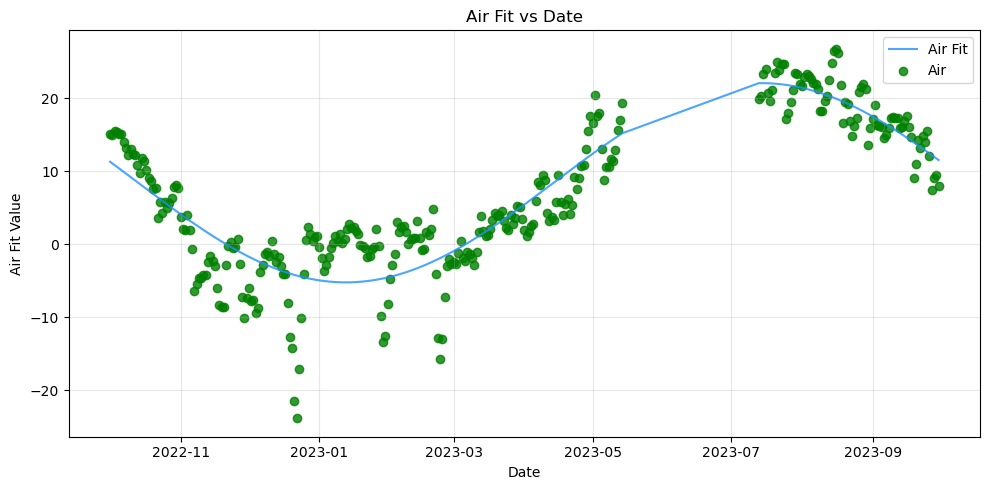

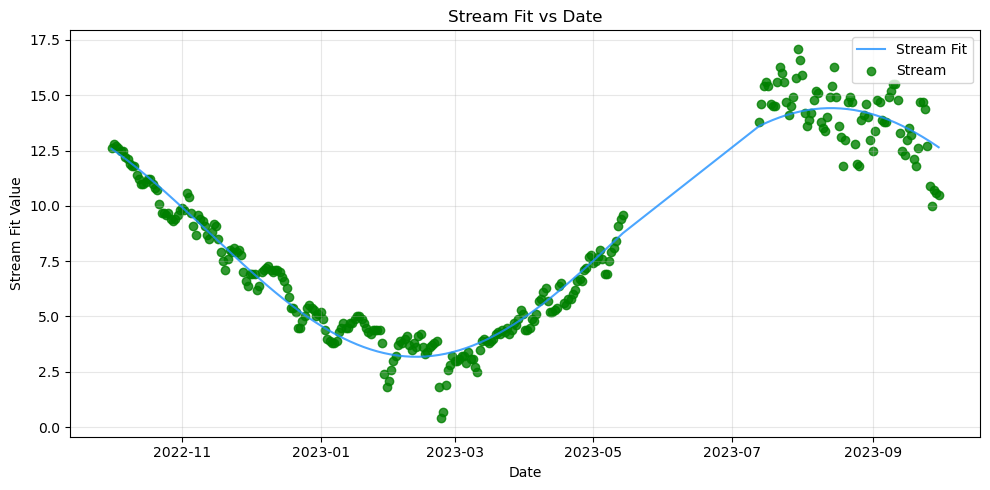

merged_df_wy:             date      tmean site_no_x  Days_Since_October_1st     rad_d  \
10500 2023-10-01  10.494100  12305000                       0  0.000000   
10501 2023-10-02  10.308700  12305000                       1  0.017214   
10502 2023-10-03  12.113899  12305000                       2  0.034428   
10503 2023-10-04  13.562300  12305000                       3  0.051643   
10504 2023-10-05  11.551100  12305000                       4  0.068857   

       sin_rday  cos_rday site_no_y                  datetime  00010_Maximum  \
10500  0.000000  1.000000  12305000 2023-10-01 00:00:00+00:00           12.2   
10501  0.017213  0.999852  12305000 2023-10-02 00:00:00+00:00           12.3   
10502  0.034422  0.999407  12305000 2023-10-03 00:00:00+00:00           12.4   
10503  0.051620  0.998667  12305000 2023-10-04 00:00:00+00:00           12.0   
10504  0.068802  0.997630  12305000 2023-10-05 00:00:00+00:00           10.5   

      00010_Maximum_cd  00010_Minimum 00010_Minimum_cd

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_wy['fit_air'] = air_model.predict( merged_df_wy )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_wy['ST']=merged_df_wy['00010_Mean']
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of

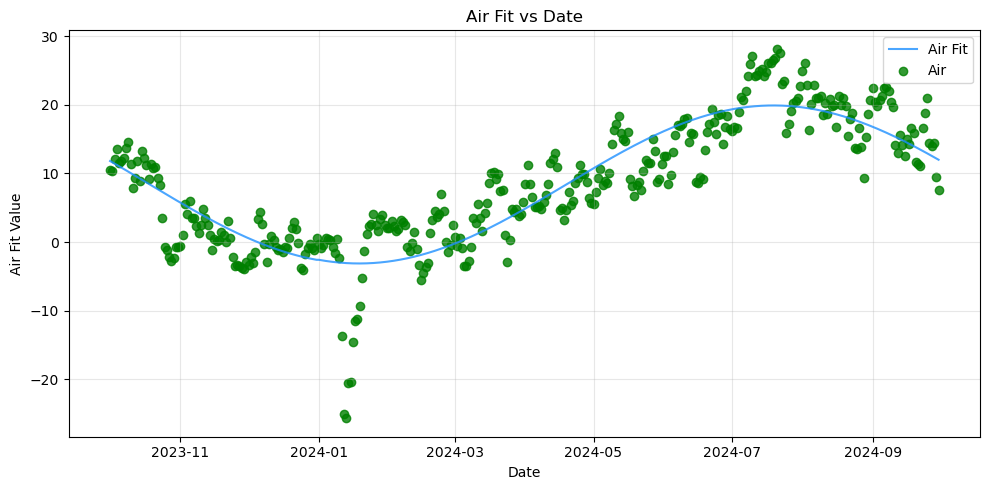

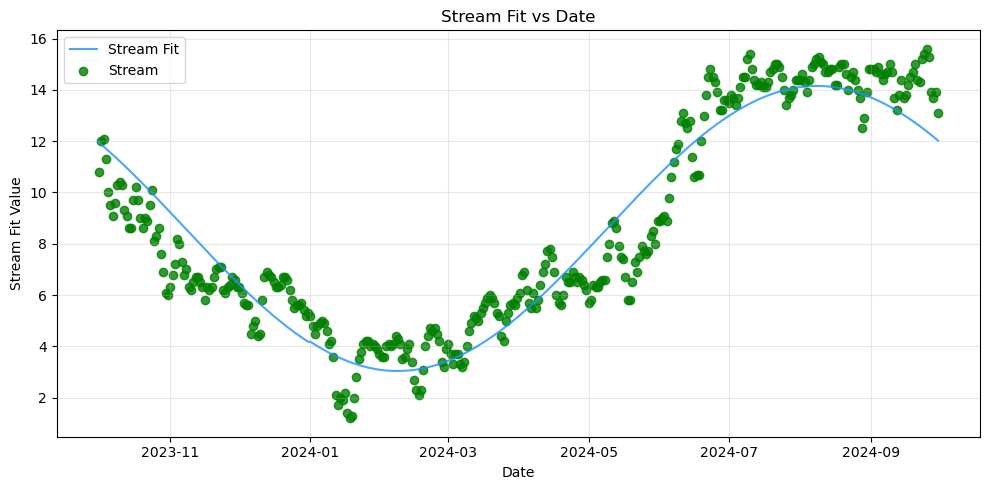

06038800
            date      tmean   site_no  Days_Since_October_1st     rad_d  \
0     1995-01-01 -18.306002  06038800                      92  1.583707   
1     1995-01-02 -17.829000  06038800                      93  1.600921   
2     1995-01-03 -18.317001  06038800                      94  1.618135   
3     1995-01-04 -15.904000  06038800                      95  1.635350   
4     1995-01-05 -11.903001  06038800                      96  1.652564   
...          ...        ...       ...                     ...       ...   
10875 2024-10-10  11.114450  06038800                       9  0.154928   
10876 2024-10-11  11.936200  06038800                      10  0.172142   
10877 2024-10-12  10.728550  06038800                      11  0.189356   
10878 2024-10-13  10.464849  06038800                      12  0.206570   
10879 2024-10-14  13.079100  06038800                      13  0.223785   

       sin_rday  cos_rday  
0      0.999917 -0.012910  
1      0.999546 -0.030120  
2     

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

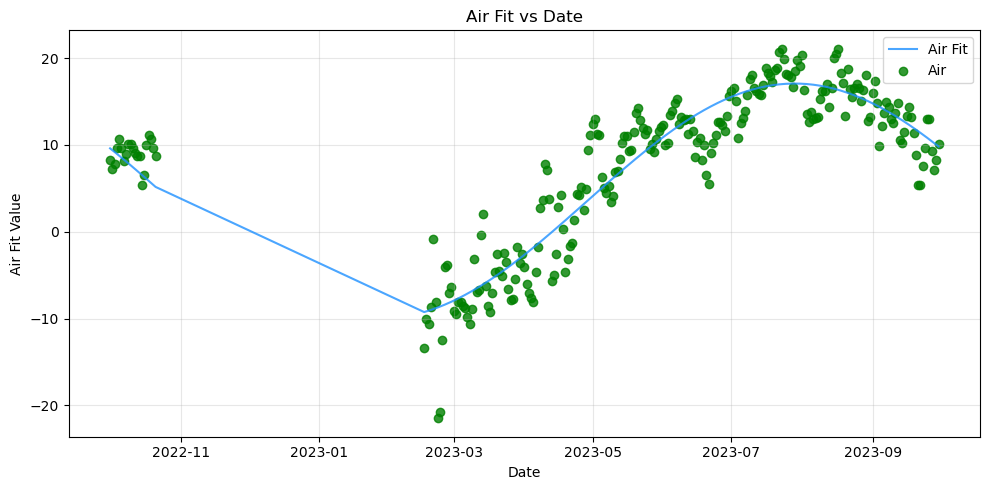

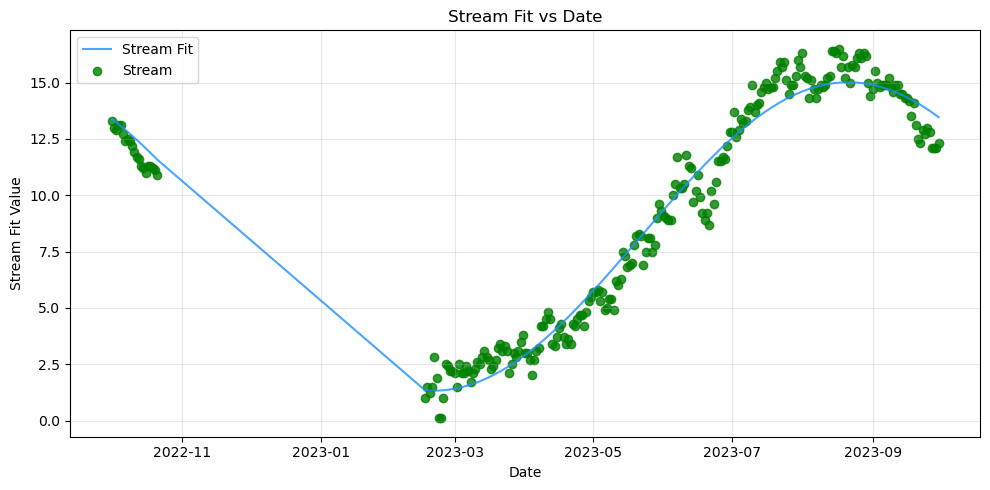

merged_df_wy:             date   tmean site_no_x  Days_Since_October_1st     rad_d  \
10500 2023-10-01  4.2281  06038800                       0  0.000000   
10501 2023-10-02  4.0466  06038800                       1  0.017214   
10502 2023-10-03  6.0440  06038800                       2  0.034428   
10503 2023-10-04  6.0247  06038800                       3  0.051643   
10504 2023-10-05  7.8832  06038800                       4  0.068857   

       sin_rday  cos_rday site_no_y                  datetime  00010_Maximum  \
10500  0.000000  1.000000  06038800 2023-10-01 00:00:00+00:00           12.8   
10501  0.017213  0.999852  06038800 2023-10-02 00:00:00+00:00           12.8   
10502  0.034422  0.999407  06038800 2023-10-03 00:00:00+00:00           12.7   
10503  0.051620  0.998667  06038800 2023-10-04 00:00:00+00:00           12.2   
10504  0.068802  0.997630  06038800 2023-10-05 00:00:00+00:00           13.4   

      00010_Maximum_cd  00010_Minimum 00010_Minimum_cd  00010_Mean  \
10

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_wy['fit_air'] = air_model.predict( merged_df_wy )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_wy['ST']=merged_df_wy['00010_Mean']
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_12386/1958722996.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of

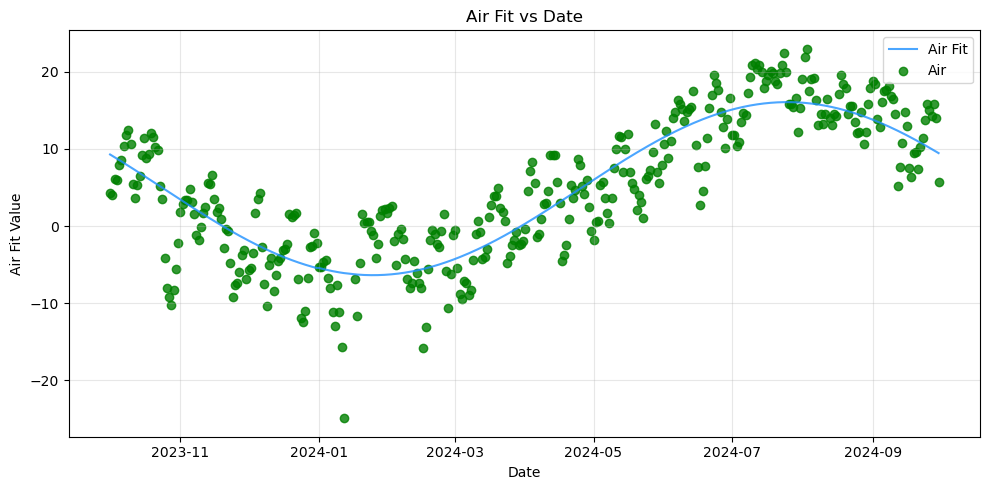

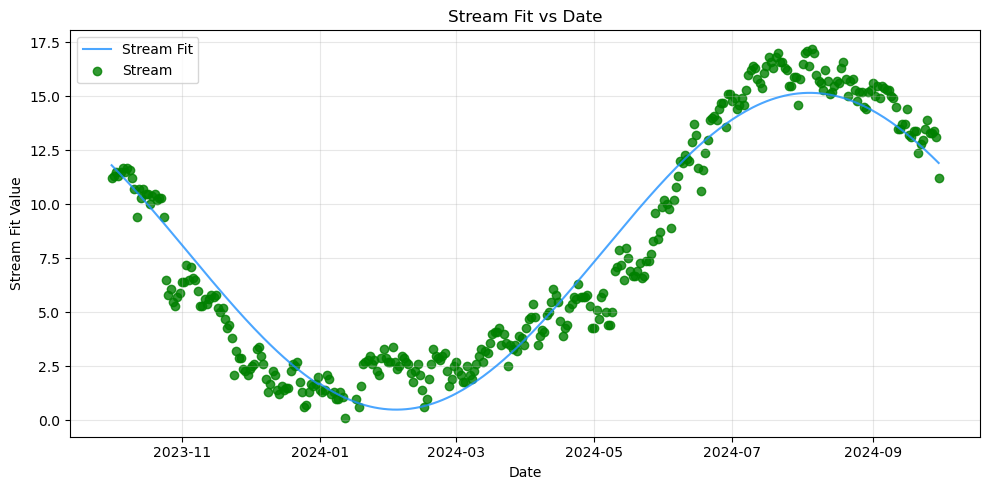

In [12]:
for site in siteNumber: 
    # 1. DATA

    print(site)

    prism_df2 = prism_df[prism_df["site_no"] == site ]

    prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
    prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )

    print( prism_df2   )

    dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])
    dailyStreamtemp_df["site_no"] = dailyStreamtemp_df["site_no"].astype(str)
    dailyStreamtemp_df2=dailyStreamtemp_df[ dailyStreamtemp_df['site_no'] == site        ]
    print(     "dailyStreamtemp_df2:",    dailyStreamtemp_df2 )
    merged_df = pd.merge( prism_df2,  dailyStreamtemp_df2,     left_on='date', right_on='Date',  how='outer')
    merged_df=merged_df.dropna()

    def get_water_year(date):
        if date.month >= 10:   
            return date.year +1
        else:   
            return date.year

    merged_df['water_year'] = merged_df['Date'].apply(get_water_year)    
    print( merged_df.head()         )
    print( "water year unique:" , merged_df['water_year'].unique())

   # 2. MODEL 
    
    for wy in merged_df['water_year'].unique():
        merged_df_wy= merged_df[ merged_df['water_year'] == wy ]
        
        air_model =    smf.ols('tmean ~ sin_rday + cos_rday',      data=  merged_df_wy ).fit()
        merged_df_wy['fit_air'] = air_model.predict( merged_df_wy )
        print("merged_df_wy:",merged_df_wy.head())
        print("cols:",merged_df_wy.columns)
        merged_df_wy['ST']=merged_df_wy['00010_Mean']
        stream_model = smf.ols('ST ~ sin_rday + cos_rday', data= merged_df_wy ).fit()
        merged_df_wy['fit_stream'] = stream_model.predict( merged_df_wy )
        
        plt.figure(figsize=(10, 5))
        plt.plot( merged_df_wy['date'],  merged_df_wy['fit_air'], label='Air Fit', color='dodgerblue', alpha=0.8)
        plt.scatter( merged_df_wy['date'],  merged_df_wy['tmean'], label='Air', color='green', alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Air Fit Value')
        plt.title('Air Fit vs Date')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot( merged_df_wy['date'],  merged_df_wy['fit_stream'], label='Stream Fit', color='dodgerblue', alpha=0.8)
        plt.scatter( merged_df_wy['date'],  merged_df_wy['ST'], label='Stream', color='green', alpha=0.8)
        plt.xlabel('Date')
        plt.ylabel('Stream Fit Value')
        plt.title('Stream Fit vs Date')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()